# Calculating Halo Mass Function
### Read in Data

In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import random
from astroML.correlation import two_point

cdm = h5py.File('COLOR_CDM_DM_Haloes_z0.00.hdf5', 'r')
wdm = h5py.File('COLOR_WDM_DM_Haloes_z0.00.hdf5', 'r')

print(cdm,wdm)

<HDF5 file "COLOR_CDM_DM_Haloes_z0.00.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_Haloes_z0.00.hdf5" (mode r)>


In [2]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm[list(cdm.keys())[0]][:]
cdm_position = cdm[list(cdm.keys())[1]][:]

wdm_mass = wdm[list(wdm.keys())[0]][:]
wdm_position = wdm[list(cdm.keys())[1]][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['HaloMass', 'HaloPos'] ['HaloMass', 'HaloPos']


(array([1.62182445e+14, 2.89476434e+14, 2.65510885e+14, ...,
        1.67210672e+08, 1.05606736e+08, 1.49609552e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [ 5.65795279, 75.58935547, 47.56488037],
        [ 9.07952595, 35.07923126, 54.54546738],
        ...,
        [ 1.47748184,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.0621109 ,  4.18381071,  2.89533401]]),
 array([1.46641357e+14, 2.85280284e+14, 2.59727578e+14, ...,
        1.05606736e+08, 1.58410112e+08, 1.58410112e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328232e+01],
        [5.73223782e+00, 7.56417389e+01, 4.75691986e+01],
        [9.07071495e+00, 3.51130295e+01, 5.45637627e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758301e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897183e-03, 3.23730040e+00, 9.97708917e-01]]))

### Create the Halo Mass Functions!

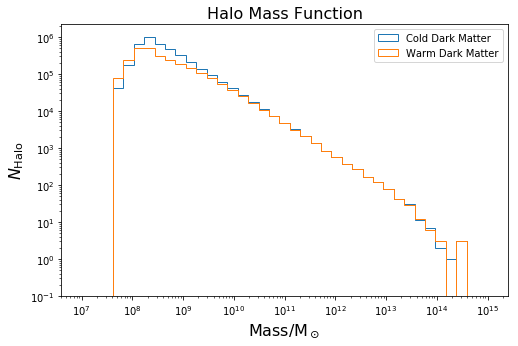

In [4]:
# Create a histogram
bins = np.logspace(7, 15, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm, bins_cdm, patches_cdm = plt.hist(cdm_mass, bins = bins, log = True, histtype = 'step', label = "Cold Dark Matter")
N_wdm, bins_wdm, patches_wdm = plt.hist(wdm_mass, bins = bins, log = True, histtype = 'step', label = "Warm Dark Matter")
plt.title("Halo Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Halo}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()
plt.savefig("Images/Data1/HMF_Hist.png")
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


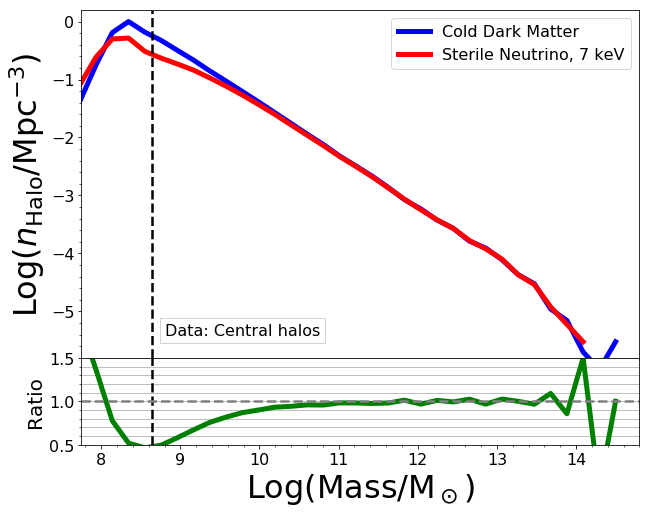

In [87]:
# line plot of histogram
# USE for report!!

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

textstr = 'Data: Central halos'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), label = "Sterile Neutrino, 7 keV", linewidth = 5, color = "red")
grid0.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
#plt.title("Halo Mass Function", fontsize = 16)
grid0.set_ylabel(r"Log($n_{\rm {Halo}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.8, 0.2)
grid0.set_xlim(7.75, 14.8)
grid0.text(0.15, 0.1, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.plot(np.log10(0.5*(bins[1:]+bins[:-1])), n_wdm/n_cdm, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize=20)
grid1.axvline(x = m_res, color = "black", ls = "--", linewidth = 2.5)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.5, 1.5)
grid1.set_xlim(7.75, 14.8)
grid1.yaxis.grid(which="both")

plt.savefig("Images/Data1/HMF.pdf")
plt.savefig("Images/Data1/HMF.png")
plt.show()

# Let's try the Correlation Function on a random sample!
### First, make a random sample of size 10000

In [3]:
random.seed(6231998)

len_cdm_pos = len(cdm_position)
len_wdm_pos = len(wdm_position)

cdm_ind = random.sample(range(len_cdm_pos), 10000)
cdm_ind.sort()
cdm_sample = cdm_position[cdm_ind]

wdm_ind = random.sample(range(len_wdm_pos), 10000)
wdm_ind.sort()
wdm_sample = wdm_position[wdm_ind]

cdm_sample, wdm_sample

(array([[ 89.5896759 ,  42.52074051,  94.6571579 ],
        [ 85.74271393,  41.50860977,  22.98365593],
        [ 42.6837616 ,  39.03107071,  84.10127258],
        ..., 
        [ 12.34729481,  16.0563488 ,  92.71443939],
        [  3.1029501 ,  10.09503651,  90.90200043],
        [  9.49395752,   8.1326952 ,  88.60515594]]),
 array([[ 38.53261566,  27.44032669,  47.40185547],
        [ 53.61967087,  23.99758339,  28.47554398],
        [ 84.39325714,  55.46370316,  54.94112778],
        ..., 
        [ 17.33135986,  19.03611946,  77.34182739],
        [ 21.320467  ,  12.5075798 ,   1.12907875],
        [  3.14744878,  24.12247849,  93.06358337]]))

### Let's see the range of distances:

In [ ]:
fig = plt.figure(figsize = (8,5))
plt.hist(cdm_sample, bins = 50, label = "Cold Dark Matter")
plt.hist(wdm_sample, bins = 50, label = "Warm Dark Matter")
plt.title("Position Histogram", fontsize = 16)
plt.ylabel(r"$N$", fontsize = 16)
plt.xlabel("R (Mpc)", fontsize = 16)
plt.legend()
plt.show()

500000-1mil galaxies corrfunc
do ratio of corrfunc in panel underneath
split by mass (10^8 - 10^10,10^10 - 10^12, 10^12+) --> sample if too many halos within each range

# Now we can calculate the correlation function
### Pick bins that are 1/10th of the entire range

In [ ]:
bins = np.logspace(-0.5,1,30)

cdm_corrfunc = two_point(cdm_sample, bins, "landy-szalay")
wdm_corrfunc = two_point(wdm_sample, bins, "landy-szalay")

cdm_corrfunc, wdm_corrfunc

In [ ]:
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-1.1, 1)
grid0.set_xlim(-0.5, 1)
grid0.set_title("10,000 Halos", fontsize = 16)

grid1.plot(np.log10(bins[1:]), wdm_corrfunc/cdm_corrfunc)
grid1.set_xlabel("Log(Radius/Mpc)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(0, 2.9)
grid1.set_xlim(-0.5, 1)

plt.savefig("Images/Data1/Corrfunc.png")
plt.show()

### Now let's try a larger sample of size 300,000!

In [ ]:
cdm_ind2 = random.sample(range(len_cdm_pos), 300000)
cdm_ind2.sort()
cdm_sample2 = cdm_position[cdm_ind2]

wdm_ind2 = random.sample(range(len_wdm_pos), 300000)
wdm_ind2.sort()
wdm_sample2 = wdm_position[wdm_ind2]

print(len(cdm_sample2), len(wdm_sample2))
cdm_sample2, wdm_sample2

In [ ]:
cdm_corrfunc_sample2 = two_point(cdm_sample2, bins, "landy-szalay")
wdm_corrfunc_sample2 = two_point(wdm_sample2, bins, "landy-szalay")

cdm_corrfunc_sample2, wdm_corrfunc_sample2

In [ ]:
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc_sample2), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc_sample2), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_ylim(-1.1, 0.9)
grid0.set_xlim(-0.5, 1)
grid0.set_title("300,000 Halos", fontsize = 16)

grid1.plot(np.log10(bins[1:]), wdm_corrfunc_sample2/cdm_corrfunc_sample2)
grid1.set_xlabel("Log(Radius/Mpc)", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.minorticks_on()
grid1.set_ylim(.9, 1.1)
grid1.set_xlim(-0.5, 1)

plt.savefig("Images/Data1/Corrfunc_Large.png")
plt.show()

# Next, compute the correlation function for all galaxies
### First, we need to split them by mass

In [ ]:
# CDM Mass
cdm_mass1_ind = np.where(np.array(cdm_mass) < 10**10)
cdm_mass3_ind = np.where(np.array(cdm_mass) > 10**12)

len_cdm_mass = len(cdm_mass)
cdm_mass2_ind = np.setdiff1d(range(len(cdm_mass)), np.append(cdm_mass1_ind, cdm_mass3_ind))

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where(np.array(wdm_mass) < 10**10)
wdm_mass3_ind = np.where(np.array(wdm_mass) > 10**12)

len_wdm_mass = len(wdm_mass)
wdm_mass2_ind = np.setdiff1d(range(len(wdm_mass)), np.append(wdm_mass1_ind, wdm_mass3_ind))

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

### Reduce the larger datasets to a more manageable size

In [ ]:
cdm_mass1_ind = random.sample(range(len(cdm_mass1)), 300000)
cdm_mass1_ind.sort()
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind]

wdm_mass1_ind = random.sample(range(len(wdm_mass1)), 300000)
wdm_mass1_ind.sort()
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind]

cdm_mass1_sample, wdm_mass1_sample

### And get their corresponding positions

In [ ]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

### Now we can compute their respective correlation functions

In [ ]:
# CDM Correlation Function
cdm_corrfunc1 = two_point(cdm_pos1, bins, "landy-szalay")
cdm_corrfunc2 = two_point(cdm_pos2, bins, "landy-szalay")
cdm_corrfunc3 = two_point(cdm_pos3, bins, "landy-szalay")

# WDM Correlation Function
wdm_corrfunc1 = two_point(wdm_pos1, bins, "landy-szalay")
wdm_corrfunc2 = two_point(wdm_pos2, bins, "landy-szalay")
wdm_corrfunc3 = two_point(wdm_pos3, bins, "landy-szalay")

print(cdm_corrfunc1, cdm_corrfunc2, cdm_corrfunc3)
print(wdm_corrfunc1, wdm_corrfunc2, wdm_corrfunc3)

### And graph them!

In [ ]:
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc1), label = "Cold Dark Matter")
grid0.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc1), label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"Log($\xi$/Mpc)", fontsize = 16)
grid0.set_title(r"< 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc2))
grid1.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc2))
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.plot(np.log10(bins[1:]), np.log10(cdm_corrfunc3))
grid2.plot(np.log10(bins[1:]), np.log10(wdm_corrfunc3))
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.plot(np.log10(bins[1:]), wdm_corrfunc1/cdm_corrfunc1)
grid3.set_ylabel("Ratio")

grid4.plot(np.log10(bins[1:]), wdm_corrfunc2/cdm_corrfunc2)
grid4.set_xlabel("Log(Radius/Mpc)", fontsize = 16)

grid5.plot(np.log10(bins[1:]), wdm_corrfunc3/cdm_corrfunc3)

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(-0.6, 1.1)
    plt.subplot(grid[i]).set_ylim(-1, 1.1)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.8, 1.15)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data1/Corrfunc_Mass.png")
plt.show()

# Now let's do it in Odyssey
### First, we need to split them by mass

In [ ]:
# CDM Mass
cdm_mass1_ind = np.where((cdm_mass > 10**8.6) &(cdm_mass < 10**10))
cdm_mass2_ind = np.where((cdm_mass > 10**10) & (cdm_mass < 10**12))
cdm_mass3_ind = np.where(cdm_mass > 10**12)

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where((wdm_mass > 10**8.6) &(wdm_mass < 10**10))
wdm_mass2_ind = np.where((wdm_mass > 10**10) & (wdm_mass < 10**12))
wdm_mass3_ind = np.where(wdm_mass > 10**12)

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

In [ ]:
# low mass group
cdm_mass1_ind = random.sample(range(len(cdm_mass1)), 870000)
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind]

wdm_mass1_ind = random.sample(range(len(wdm_mass1)), 870000)
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind]

# mid mass group
cdm_mass2_ind = random.sample(range(len(cdm_mass2)), 84000)
cdm_mass2_sample = cdm_mass2[cdm_mass2_ind]

wdm_mass2_ind = random.sample(range(len(wdm_mass2)), 84000)
wdm_mass2_sample = wdm_mass2[wdm_mass2_ind]

# high mass group
cdm_mass3_ind = random.sample(range(len(cdm_mass3)), 1430)
cdm_mass3_sample = cdm_mass3[cdm_mass3_ind]

wdm_mass3_ind = random.sample(range(len(wdm_mass3)), 1430)
wdm_mass3_sample = wdm_mass3[wdm_mass3_ind]

cdm_mass1_sample, wdm_mass1_sample, cdm_mass2_sample, wdm_mass2_sample, cdm_mass3_sample, wdm_mass3_sample

In [ ]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

In [ ]:
np.savetxt("cdm_pos_low_mass.txt", cdm_pos1, fmt = "%f %f %f")
np.savetxt("wdm_pos_low_mass.txt", wdm_pos1, fmt = "%f %f %f")

np.savetxt("cdm_pos_mid_mass.txt", cdm_pos2, fmt = "%f %f %f")
np.savetxt("wdm_pos_mid_mass.txt", wdm_pos2, fmt = "%f %f %f")

np.savetxt("cdm_pos_high_mass.txt", cdm_pos3, fmt = "%f %f %f")
np.savetxt("wdm_pos_high_mass.txt", wdm_pos3, fmt = "%f %f %f")

In [4]:
CUTE_cdm_low = np.genfromtxt("corr_cdm_low_mass.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("corr_wdm_low_mass.txt", usecols = (0,1))

CUTE_cdm_mid = np.genfromtxt("corr_cdm_mid_mass.txt", usecols = (0,1))
CUTE_wdm_mid = np.genfromtxt("corr_wdm_mid_mass.txt", usecols = (0,1))

CUTE_cdm_high = np.genfromtxt("corr_cdm_high_mass.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("corr_wdm_high_mass.txt", usecols = (0,1))

In [ ]:
# CUTE_cdm_low_old = CUTE_cdm_low
# CUTE_wdm_low_old = CUTE_wdm_low

In [ ]:
# np.savetxt("corr_cdm_low_mass_old.txt", CUTE_cdm_low_old, fmt = "%f %f")
# np.savetxt("corr_wdm_low_mass_old.txt", CUTE_wdm_low_old, fmt = "%f %f")

In [ ]:
CUTE_cdm_low = np.genfromtxt("corr_cdm_low_mass.txt", usecols = (0,1))
plt.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = 'new')
plt.loglog(CUTE_cdm_low_old[:,0], CUTE_cdm_low_old[:,1], label = 'old')
plt.xlim(1e-2, 4e1)
plt.legend()
plt.show()

In [ ]:
plt.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1])
plt.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1])
plt.xlim(1e-2, 4e1)
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


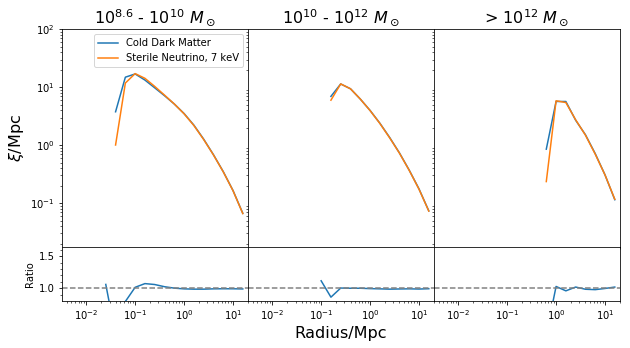

In [6]:
plt.figure(figsize=(8,8))
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.set_title(r"10$^{8.6}$ - 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.loglog(CUTE_cdm_mid[:,0], CUTE_cdm_mid[:,1])
grid1.loglog(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1])
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1])
grid2.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1])
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1])
grid3.set_ylabel("Ratio")

grid4.semilogx(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1]/CUTE_cdm_mid[:,1])
grid4.set_xlabel("Radius/Mpc", fontsize = 16)

grid5.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1])

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(10**-2.5, 2e1)
    plt.subplot(grid[i]).set_ylim(10**-1.75, 10**2)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.8, 1.65)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data1/Corrfunc_Mass_Odyssey.png")
plt.show()

# Let's calculate the correlation function at fixed number density!
### First, 1,000,000 halos

In [ ]:
cdm_mass_ind = sorted(range(len(cdm_mass)), key=lambda k: cdm_mass[k], reverse = True)
wdm_mass_ind = sorted(range(len(wdm_mass)), key=lambda k: wdm_mass[k], reverse = True)

cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:1000000]], wdm_mass[wdm_mass_ind[:1000000]]

In [ ]:
np.savetxt("cdm_pos_sorted_centrals.txt", cdm_position[cdm_mass_ind[:1000000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted_centrals.txt", wdm_position[wdm_mass_ind[:1000000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:1000000]], wdm_position[wdm_mass_ind[:1000000]]

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


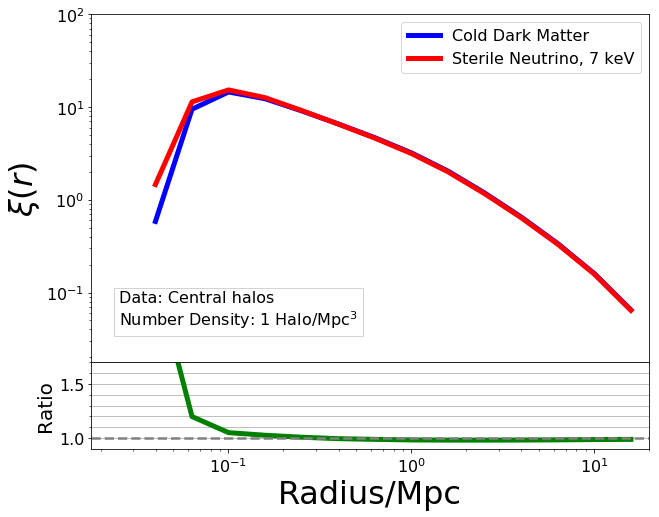

In [89]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_pos_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_pos_sorted_centrals.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central halos',
    r'Number Density: 1 Halo/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, color = "red")
grid0.set_xlim(10**-1.75, 2e1)
grid0.set_ylim(10**-1.75, 10**2)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
# grid0.set_title("1 Halo/Mpc$^{3}$", fontsize = 16)
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1], linewidth = 5, color = "green")
grid1.set_xlabel("Radius/Mpc", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize=20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.set_xlim(10**-1.75, 2e1)
grid1.set_ylim(0.9, 1.7)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals.pdf")
plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals.png")
plt.show()

### Next, 100,000 halos!

In [ ]:
np.savetxt("cdm_pos_sorted_centrals2.txt", cdm_position[cdm_mass_ind[:100000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted_centrals2.txt", wdm_position[wdm_mass_ind[:100000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:100000]], wdm_position[wdm_mass_ind[:100000]]

In [ ]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_pos_sorted_centrals2.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_pos_sorted_centrals2.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-1.25, 2e1)
grid0.set_ylim(10**-1.25, 10**1.25)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("0.1 Halo/Mpc$^{3}$", fontsize = 16)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-1.25, 2e1)
grid1.set_ylim(0.8, 1.1)
grid1.minorticks_on()

plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals2.png")
plt.show()

### And lastly, 1,000 halos

In [ ]:
np.savetxt("cdm_pos_sorted_centrals3.txt", cdm_position[cdm_mass_ind[:1000]], fmt = "%f %f %f")
np.savetxt("wdm_pos_sorted_centrals3.txt", wdm_position[wdm_mass_ind[:1000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:1000]], wdm_position[wdm_mass_ind[:1000]]

In [ ]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_pos_sorted_centrals3.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_pos_sorted_centrals3.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(10**-0.25, 2e1)
grid0.set_ylim(10**-1, 10**1)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("0.001 Halo/Mpc$^{3}$", fontsize = 16)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(10**-0.25, 2e1)
grid1.set_ylim(0.8, 1.1)
grid1.minorticks_on()

plt.savefig("Images/Data1/Corrfunc_Largest_Sorted_Centrals3.png")
plt.show()

# Split Mass at Fixed Number Density!

In [ ]:
# CDM Mass
cdm_mass1_ind = np.where((cdm_mass > 10**8.6) &(cdm_mass < 10**10))
cdm_mass2_ind = np.where((cdm_mass > 10**10) & (cdm_mass < 10**12))
cdm_mass3_ind = np.where(cdm_mass > 10**12)

cdm_mass1 = np.array(cdm_mass)[cdm_mass1_ind]
cdm_mass2 = np.array(cdm_mass)[cdm_mass2_ind]
cdm_mass3 = np.array(cdm_mass)[cdm_mass3_ind]

# WDM Mass
wdm_mass1_ind = np.where((wdm_mass > 10**8.6) &(wdm_mass < 10**10))
wdm_mass2_ind = np.where((wdm_mass > 10**10) & (wdm_mass < 10**12))
wdm_mass3_ind = np.where(wdm_mass > 10**12)

wdm_mass1 = np.array(wdm_mass)[wdm_mass1_ind]
wdm_mass2 = np.array(wdm_mass)[wdm_mass2_ind]
wdm_mass3 = np.array(wdm_mass)[wdm_mass3_ind]

print(cdm_mass1, cdm_mass2, cdm_mass3)
print(wdm_mass1, wdm_mass2, wdm_mass3)

print(len(cdm_mass1), len(cdm_mass2), len(cdm_mass3))
print(len(wdm_mass1), len(wdm_mass2), len(wdm_mass3))

In [ ]:
# low mass group
cdm_mass1_ind = sorted(range(len(cdm_mass1)), key=lambda k: cdm_mass1[k], reverse = True)
cdm_mass1_sample = cdm_mass1[cdm_mass1_ind[:870000]]

wdm_mass1_ind = sorted(range(len(wdm_mass1)), key=lambda k: wdm_mass1[k], reverse = True)
wdm_mass1_sample = wdm_mass1[wdm_mass1_ind[:870000]]

# mid mass group
cdm_mass2_ind = sorted(range(len(cdm_mass2)), key=lambda k: cdm_mass2[k], reverse = True)
cdm_mass2_sample = cdm_mass2[cdm_mass2_ind[:84000]]

wdm_mass2_ind = sorted(range(len(wdm_mass2)), key=lambda k: wdm_mass2[k], reverse = True)
wdm_mass2_sample = wdm_mass2[wdm_mass2_ind[:84000]]

# high mass group
cdm_mass3_ind = sorted(range(len(cdm_mass3)), key=lambda k: cdm_mass3[k], reverse = True)
cdm_mass3_sample = cdm_mass3[cdm_mass3_ind[:1430]]

wdm_mass3_ind = sorted(range(len(wdm_mass3)), key=lambda k: wdm_mass3[k], reverse = True)
wdm_mass3_sample = wdm_mass3[wdm_mass3_ind[:1430]]

cdm_mass1_sample, wdm_mass1_sample, cdm_mass2_sample, wdm_mass2_sample, cdm_mass3_sample, wdm_mass3_sample

In [ ]:
cdm_pos1 = np.array(cdm_position)[cdm_mass1_ind]
cdm_pos2 = np.array(cdm_position)[cdm_mass2_ind]
cdm_pos3 = np.array(cdm_position)[cdm_mass3_ind]

wdm_pos1 = np.array(wdm_position)[wdm_mass1_ind]
wdm_pos2 = np.array(wdm_position)[wdm_mass2_ind]
wdm_pos3 = np.array(wdm_position)[wdm_mass3_ind]

In [ ]:
np.savetxt("cdm_pos_low_mass_sorted_centrals.txt", cdm_pos1, fmt = "%f %f %f")
np.savetxt("wdm_pos_low_mass_sorted_centrals.txt", wdm_pos1, fmt = "%f %f %f")

np.savetxt("cdm_pos_mid_mass_sorted_centrals.txt", cdm_pos2, fmt = "%f %f %f")
np.savetxt("wdm_pos_mid_mass_sorted_centrals.txt", wdm_pos2, fmt = "%f %f %f")

np.savetxt("cdm_pos_high_mass_sorted_centrals.txt", cdm_pos3, fmt = "%f %f %f")
np.savetxt("wdm_pos_high_mass_sorted_centrals.txt", wdm_pos3, fmt = "%f %f %f")

In [ ]:
CUTE_cdm_low = np.genfromtxt("corr_cdm_low_mass_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_low = np.genfromtxt("corr_wdm_low_mass_sorted_centrals.txt", usecols = (0,1))

CUTE_cdm_mid = np.genfromtxt("corr_cdm_mid_mass_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_mid = np.genfromtxt("corr_wdm_mid_mass_sorted_centrals.txt", usecols = (0,1))

CUTE_cdm_high = np.genfromtxt("corr_cdm_high_mass_sorted_centrals.txt", usecols = (0,1))
CUTE_wdm_high = np.genfromtxt("corr_wdm_high_mass_sorted_centrals.txt", usecols = (0,1))

In [ ]:
grid = gridspec.GridSpec(2,3, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(10,5))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])
grid4 = plt.subplot(grid[4])
grid5 = plt.subplot(grid[5])

grid0.loglog(CUTE_cdm_low[:,0], CUTE_cdm_low[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.set_title(r"10$^{8.6}$ - 10$^{10}$ $M_\odot$", fontsize = 16)
grid0.legend()

grid1.loglog(CUTE_cdm_mid[:,0], CUTE_cdm_mid[:,1])
grid1.loglog(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1])
grid1.set_title(r"10$^{10}$ - 10$^{12}$ $M_\odot$", fontsize = 16)

grid2.loglog(CUTE_cdm_high[:,0], CUTE_cdm_high[:,1])
grid2.loglog(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1])
grid2.set_title(r"> 10$^{12}$ $M_\odot$", fontsize = 16)

grid3.semilogx(CUTE_wdm_low[:,0], CUTE_wdm_low[:,1]/CUTE_cdm_low[:,1])
grid3.set_ylabel("Ratio")

grid4.semilogx(CUTE_wdm_mid[:,0], CUTE_wdm_mid[:,1]/CUTE_cdm_mid[:,1])
grid4.set_xlabel("Radius/Mpc", fontsize = 16)

grid5.semilogx(CUTE_wdm_high[:,0], CUTE_wdm_high[:,1]/CUTE_cdm_high[:,1])

for i in range(6):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(10**-2.5, 3e1)
    plt.subplot(grid[i]).set_ylim(10**-1.5,10**1.35)

for i in range(3,6):
    plt.subplot(grid[i]).set_ylim(0.9, 1.1)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--")
    
for i in range(1,3):
    plt.subplot(grid[i]).set_xticklabels([])
    plt.subplot(grid[i]).set_yticklabels([]) 
    plt.subplot(grid[i]).set_xticks([])
    plt.subplot(grid[i]).set_yticks([])
    
for i in range(4,6):
    plt.subplot(grid[i]).set_yticklabels([])
    plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data2/Corrfunc_Mass_Odyssey.png")
plt.show()